### K-Nearest Neighbors Algorithm without Sklearn

Importing required modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

Loading the dataset

In [2]:
iris = sns.load_dataset("iris")
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


Extracting features and labels as X and y respectively 

- Features

In [18]:
X = iris.drop(["species"],axis=1)
print("Features : "," , ".join(X.columns))
X.head(3)

Features :  sepal_length , sepal_width , petal_length , petal_width


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- Labels

In [19]:
y = iris["species"]
print("Labels : "," , ".join(y.unique()))

Labels :  setosa , versicolor , virginica


**With sklearn**

Score of models with Euclidean distance

In [23]:
ESS = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i,metric="euclidean").fit(X,y)
    ESS.append(model.score(X,y))
ESS[:4]

[1.0, 0.98, 0.96, 0.96]

Score of models with Manhattan distance

In [24]:
MSS = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i,metric="manhattan").fit(X,y)
    MSS.append(model.score(X,y))
MSS[:4]

[1.0, 0.9733333333333334, 0.96, 0.96]

**Without sklearn**

In [100]:
class KNN():
    def __init__(self,dataset,columns,labels,k,dist):
        self.df = dataset #Loading the dataset
        #Dropping list of features which are not required along with the labels' column.
        self.columns = columns 
        #Choosing the column for labels
        self.labels = labels
        self.k = k #Initiating the value of k
        self.dist = dist #Distance formula to be used
    def Xandy(self):
        self.X = self.df.drop(self.columns,axis=1) #features
        self.y = self.df[self.labels] #labels
        return self.X,self.y
    def fit(self,sample):
        self.sample=sample
        if self.dist=="E": #Euclidean distance
            a = np.sqrt(np.square(np.array(self.Xandy()[0])-self.sample).sum(axis=1))
        elif self.dist=="M": #Manhattan distance
            a = np.abs(np.array(self.Xandy()[0])-self.sample).sum(axis=1)
        b = pd.DataFrame([a,self.Xandy()[1]]).T.rename(columns={0:"Distance",1:"Classes"})
        b.Distance = b.Distance.astype(float)
        return b
    def predict(self,sample): #Prediction of class where the sample should belong
        ans = self.fit(sample).nsmallest(self.k,"Distance").Classes.value_counts().index[0]
        return ans
    def Score(self):#Score of model
        scores = []
        for i in self.Xandy()[0].values:
            scores.append(self.predict(i))
        score = (scores==self.Xandy()[1]).value_counts()[True]/len(self.Xandy()[1])
        return score
    
k1 = KNN(iris,["species"],"species",11,"E")

In [101]:
print("Sample belongs to : "+k1.predict(np.array([6,1.1,3.5,2.7])))

Sample belongs to : versicolor


In [102]:
print("Score of model : ",k1.Score())

Score of model :  0.9733333333333334


Score of models with Euclidean distance

In [40]:
ESWS = []
for i in range(1,40):
    k = KNN(iris,["species"],"species",i,"E")
    ESWS.append(k.Score())

In [41]:
ESWS[:4]

[1.0, 1.0, 0.96, 0.9666666666666667]

Score of models with Manhattan distance

In [43]:
MSWS = []
for i in range(1,40):
    k = KNN(iris,["species"],"species",i,"M")
    MSWS.append(k.Score())

In [44]:
MSWS[:4]

[1.0, 1.0, 0.96, 0.9666666666666667]

Comparative Visualization

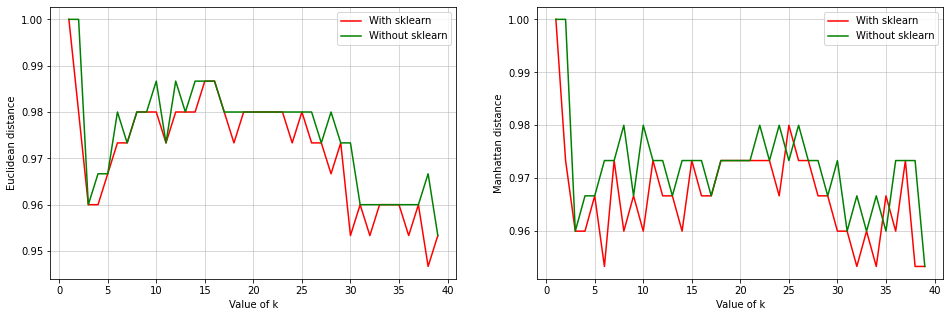

In [99]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(range(1,40),ESS,color="r")
plt.plot(range(1,40),ESWS,color="g")
plt.legend(["With sklearn","Without sklearn"])
plt.ylabel("Euclidean distance")
plt.xlabel("Value of k")
plt.grid(linewidth=0.5)

plt.subplot(1,2,2)
plt.plot(range(1,40),MSS,color="r")
plt.plot(range(1,40),MSWS,color="g")
plt.legend(["With sklearn","Without sklearn"])
plt.ylabel("Manhattan distance")
plt.xlabel("Value of k")
plt.grid(linewidth=0.5)